In [1]:
# Importing the necessary libraries
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Retrieving reviews of the producct from the website 
movie_reviews = []
key=''
url = 'https://www.imdb.com/title/tt1160419/reviews/_ajax?ref_=undefined&paginationKey={}'
for i in range(1,10):  

    response = requests.get(url.format(key))
    soup = bs(response.content,'html.parser')
    
    pagination_key = soup.find("div", class_="load-more-data")
    if not pagination_key:
        break
        
    key = pagination_key["data-key"]
    reviews = soup.find_all('div',attrs='text show-more__control')
    for review in reviews:
        movie_reviews.append(review.text) 

In [3]:
# Reviews in text format

with open('C:/Users/vaibh/Desktop/360 Digitmg/NLP/Assignments/tp_reviews.txt','w',encoding = 'utf8') as output:
    output.write(str(movie_reviews))

In [4]:
# Product reviews in list
movie_reviews[0]

"It's been amazing being back in cinemas after last year, I have seen some good films, and some shockers, this though, is the first great film of the year for me.The story is somehow easier to follow than in the last adaptation, motives and actions are easier to see and follow. I felt as though the book had come to life here, even if there are a couple of changes.The acting is impressive, as is the music, the visuals however are the most incredible thing about this film, it looks awe inspiring. The battles are epic, the staging is impressive, you almost feel close to the action, I cannot praise that element highly enough.When I saw Part one, I was a little surprised, I was a little more surprised by the ending, I only hope the wait isn't too long.Pacing, considering where the film ends, it never felt slow or drawn out, I was captivated from start to finish.Truly, I was blown away, 10/10."

In [5]:
# Joining all reviews in paragraph .i.e. converting list to string
ip_rev_string = ' '.join(movie_reviews)

In [6]:
import nltk

# Removing unwanted symbols 
ip_rev_string = re.sub('[^A-Za-z" "]+',' ',ip_rev_string.lower())

In [7]:
# Words from string
ip_reviews_words = ip_rev_string.split(' ')
ip_reviews_words = ip_reviews_words[0:]

In [8]:
ip_reviews_words

['it',
 's',
 'been',
 'amazing',
 'being',
 'back',
 'in',
 'cinemas',
 'after',
 'last',
 'year',
 '',
 'i',
 'have',
 'seen',
 'some',
 'good',
 'films',
 '',
 'and',
 'some',
 'shockers',
 '',
 'this',
 'though',
 '',
 'is',
 'the',
 'first',
 'great',
 'film',
 'of',
 'the',
 'year',
 'for',
 'me',
 'the',
 'story',
 'is',
 'somehow',
 'easier',
 'to',
 'follow',
 'than',
 'in',
 'the',
 'last',
 'adaptation',
 '',
 'motives',
 'and',
 'actions',
 'are',
 'easier',
 'to',
 'see',
 'and',
 'follow',
 '',
 'i',
 'felt',
 'as',
 'though',
 'the',
 'book',
 'had',
 'come',
 'to',
 'life',
 'here',
 '',
 'even',
 'if',
 'there',
 'are',
 'a',
 'couple',
 'of',
 'changes',
 'the',
 'acting',
 'is',
 'impressive',
 '',
 'as',
 'is',
 'the',
 'music',
 '',
 'the',
 'visuals',
 'however',
 'are',
 'the',
 'most',
 'incredible',
 'thing',
 'about',
 'this',
 'film',
 '',
 'it',
 'looks',
 'awe',
 'inspiring',
 '',
 'the',
 'battles',
 'are',
 'epic',
 '',
 'the',
 'staging',
 'is',
 'impres

In [9]:
# Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input = ip_reviews_words, use_idf=True, ngram_range=(1, 1))
X = vectorizer.fit_transform(ip_reviews_words)

In [9]:
# Fetching names of characters and actors
names = requests.get('https://m.imdb.com/title/tt1160419/fullcredits/cast')
names_soup = bs(names.content,'html.parser')
name1 = names_soup.find_all('h4')
name2 = names_soup.find_all('p')
list1 = [x.text for x in name1]
list2 = [re.sub('\n','',x.text) for x in name2]
extra_list = list1 + list2

In [18]:
extra = (' '.join(extra_list)).split(' ')
extra = [e.lower() for e in extra]
extra.extend(['frank','herbert','movie','film','denis','villeneuve','dune'])

['timothée',
 'chalamet',
 'rebecca',
 'ferguson',
 'oscar',
 'isaac',
 'jason',
 'momoa',
 'stellan',
 'skarsgård',
 'stephen',
 'mckinley',
 'henderson',
 'josh',
 'brolin',
 'javier',
 'bardem',
 'sharon',
 'duncan-brewster',
 'chang',
 'chen',
 'dave',
 'bautista',
 'david',
 'dastmalchian',
 'zendaya',
 'charlotte',
 'rampling',
 'babs',
 'olusanmokun',
 'benjamin',
 'clémentine',
 'souad',
 'faress',
 'golda',
 'rosheuvel',
 'roger',
 'yuan',
 'seun',
 'shote',
 'neil',
 'bell',
 'oliver',
 'ryan',
 'stephen',
 'collins',
 'charlie',
 'rawes',
 'richard',
 'carter',
 'ben',
 'dilloway',
 'elmi',
 'rashid',
 'elmi',
 'tachia',
 'newall',
 'gloria',
 'obianyo',
 'fehinti',
 'balogun',
 'dora',
 'kápolnai-schvab',
 'joelle',
 'jimmy',
 'walker',
 'paul',
 'bullion',
 'milena',
 'sidorova',
 'jános',
 'timkó',
 'jean',
 'gilpin',
 'marianne',
 'faithfull',
 'ellen',
 'dubin',
 'károly',
 'baksai',
 'björn',
 'freiberg',
 'balázs',
 'megyeri',
 'michael',
 'nardone',
 'duncan',
 'pow'

In [19]:
# Stopwords 
with open(r'C:\Users\vaibh\Desktop\360 Digitmg\NLP\Study/stopwords_en.txt','r') as st:
    stopwords = st.read()
stopwords = stopwords.split('\n')
# Adding new stopwords to the list
stopwords.extend(extra)

In [20]:
# Removing all stop words
ip_reviews_words = [word for word in ip_reviews_words if word not in stopwords] 

In [21]:
# Joining all words
ip_reviews_words = ' '.join(ip_reviews_words)

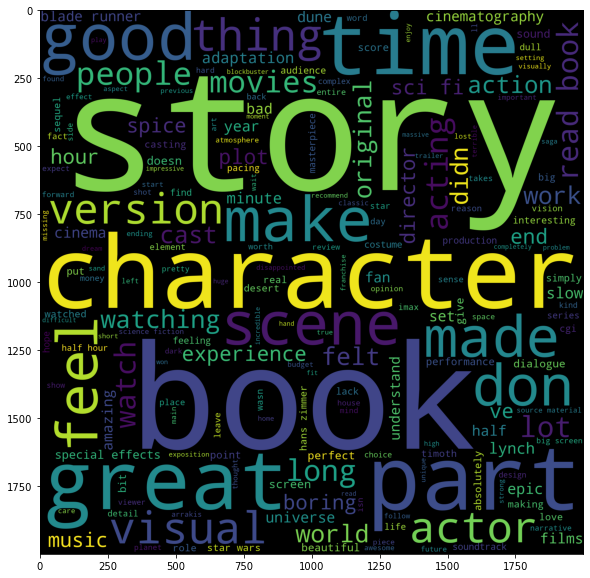

In [22]:
# Genearating wordcloud of the corpus
plt.figure(figsize=(15,10))
wordcloud_ip = WordCloud(background_color='black',width=2000,height=2000).generate(ip_reviews_words)
plt.imshow(wordcloud_ip)

In [23]:
# importing positive and negative words
with open('C:/Users/vaibh/Desktop/360 Digitmg/NLP/Study/positive-words.txt','r') as pos:
    pos_words = pos.read().split('\n')
with open('C:/Users/vaibh/Desktop/360 Digitmg/NLP/Study/negative-words.txt','r') as neg:
    neg_words = neg.read().split('\n')

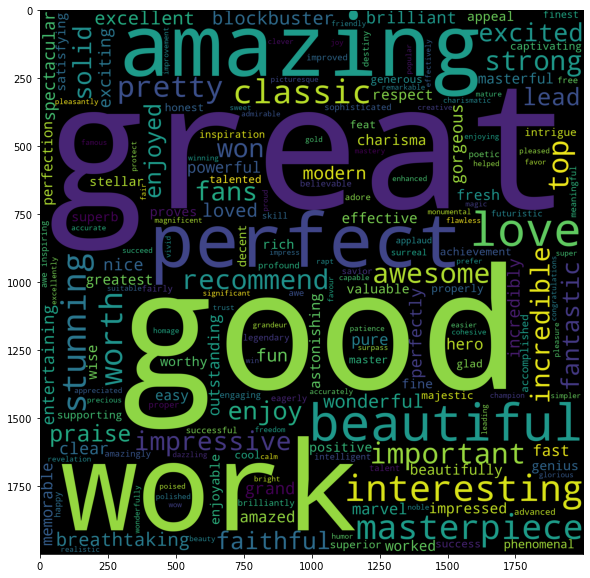

In [24]:
# Generating positive words wordcloud
pos_ip_reviews = " ".join ([word for word in ip_reviews_words.split(' ') if word in pos_words])

plt.figure(figsize=(15,10))
wordcloud_pos_ip = WordCloud(background_color='black',width=2000,height=2000).generate(pos_ip_reviews)
plt.imshow(wordcloud_pos_ip)

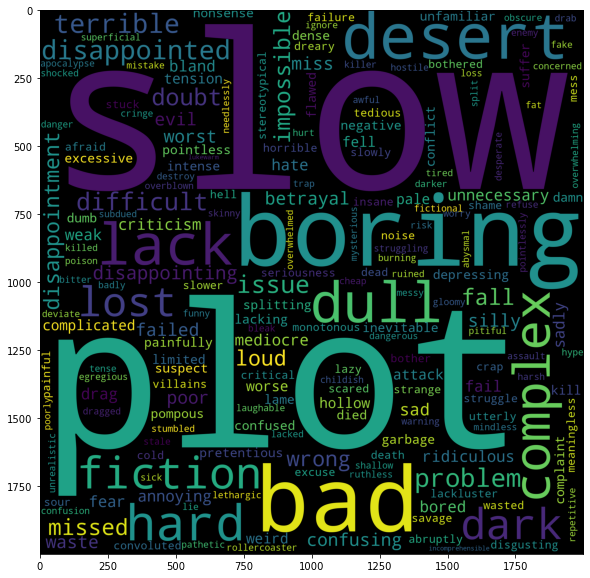

In [25]:
# Generating negative words wordcloud
neg_ip_reviews = ' '.join([word for word in ip_reviews_words.split(' ') if word in neg_words])

plt.figure(figsize=(15,10))
wordcloud_neg_ip = WordCloud(background_color='black',width=2000,height=2000).generate(neg_ip_reviews)
plt.imshow(wordcloud_neg_ip)

In [26]:
# Lemmatize each word

WNL = nltk.WordNetLemmatizer()
text_content = [WNL.lemmatize(word) for word in ip_reviews_words.split(' ')]

In [27]:
# Taking only non-null entries

text_content = [i for i in text_content if len(i) != 0]

In [28]:
# Bigrams

bigram_lists = list(nltk.bigrams(text_content))
bigrams = [' '.join(word) for word in bigram_lists]

In [29]:
# Using countvectorizer to check for frequency of bigrams

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(2,2))
bag_off_words = vect.fit_transform(bigrams)

In [30]:
# Sorting bigrams according to frequency

sum_words = bag_off_words.sum(axis=0)
words_freq = [(word,sum_words[0,idx]) for word,idx in vect.vocabulary_.items()] 
words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
words_freq[0:100]

[('read book', 50),
 ('sci fi', 41),
 ('blade runner', 35),
 ('special effect', 32),
 ('star war', 25),
 ('han zimmer', 25),
 ('half hour', 20),
 ('big screen', 17),
 ('science fiction', 16),
 ('source material', 15),
 ('action scene', 12),
 ('visual effect', 12),
 ('world building', 12),
 ('mini series', 11),
 ('planet arrakis', 10),
 ('visually stunning', 10),
 ('lynch version', 9),
 ('ve read', 8),
 ('haven read', 8),
 ('screen time', 8),
 ('wait part', 8),
 ('top notch', 8),
 ('part one', 8),
 ('character development', 8),
 ('part book', 7),
 ('action sequence', 7),
 ('production design', 7),
 ('lord ring', 7),
 ('game throne', 7),
 ('half story', 6),
 ('fight scene', 6),
 ('dune part', 6),
 ('part ii', 6),
 ('sand worm', 6),
 ('fan book', 6),
 ('forward part', 6),
 ('take time', 6),
 ('sound effect', 5),
 ('story told', 5),
 ('strong character', 5),
 ('acting good', 5),
 ('actual story', 5),
 ('desert planet', 5),
 ('slow pace', 5),
 ('space travel', 5),
 ('score han', 5),
 ('hour

(-0.5, 1999.5, 1999.5, -0.5)

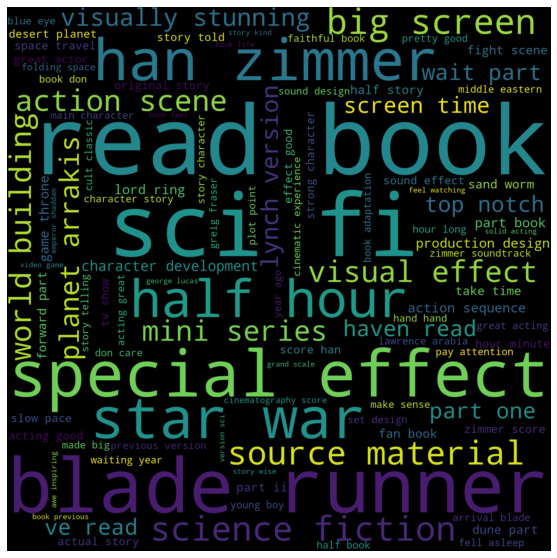

In [31]:
# Bigram Wordcloud 

plt.figure(figsize=(15,10))
wordcloud_bigram = WordCloud(max_words= 100 ,background_color='black',width=2000,height=2000).generate_from_frequencies(dict(words_freq))
plt.imshow(wordcloud_bigram, interpolation= 'bilinear')
plt.axis('off')